In [28]:
import pandas as pd
from retentioneering import datasets
from typing import Literal, Union, List, Optional, Iterable, get_args, Dict
import numpy as np 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

# Importing custom mudules

In [2]:
import sys

sys.path.append('d:\SUSU\diplom\product\insight_pulse')

for path in sys.path:
    print(path)

d:\SUSU\diplom\product\insight_pulse\features_beta
d:\Prog\CondaProg\anaconda\python311.zip
d:\Prog\CondaProg\anaconda\DLLs
d:\Prog\CondaProg\anaconda\Lib
d:\Prog\CondaProg\anaconda

d:\Prog\CondaProg\anaconda\Lib\site-packages
d:\Prog\CondaProg\anaconda\Lib\site-packages\win32
d:\Prog\CondaProg\anaconda\Lib\site-packages\win32\lib
d:\Prog\CondaProg\anaconda\Lib\site-packages\Pythonwin
d:\Prog\CondaProg\anaconda\Lib\site-packages\IPython\extensions
C:\Users\george\.ipython
d:\SUSU\diplom\product\insight_pulse


In [3]:
from eventframing.eventframe import EventFrame
from eventframing.cols_schema import EventFrameColsSchema
from eventframing.event_type import EventType

In [4]:
from data_preprocessing.preprocessors_lib.add_start_end_events import AddStartEndEventsPreprocessor
from data_preprocessing.preprocessors_lib.split_sessions import SplitSessionsPreprocessor

# Clustering Beta

In [5]:
def create_test_data():
    data = pd.DataFrame({
        'user_id': [1, 1, 1, 2, 2, 3, 3, 3, 1],
        'event_name': ['A', 'B', 'C', 'A', 'C', 'A', 'B', 'C', 'A'],
        'event_timestamp': pd.to_datetime([
            '2023-01-01 10:00', '2023-01-01 10:01', '2023-01-01 10:02',
            '2023-01-01 10:00', '2023-01-01 10:05',
            '2023-01-01 10:00', '2023-01-01 10:01', '2023-01-01 10:02',
            '2023-01-01 10:10'
        ])
    })
    cols_schema = EventFrameColsSchema({
        'user_id': 'user_id',
        'event_name': 'event_name',
        'event_timestamp': 'event_timestamp'
    })
    return data, cols_schema

ef = EventFrame(*create_test_data())

In [7]:
ef.to_dataframe().sort_values([ef.cols_schema.user_id, ef.cols_schema.event_timestamp, ef.cols_schema.event_type_index])

,user_id,event_name,event_timestamp,event_id,event_type,event_type_index
0,1,A,2023-01-01 10:00:00,0,raw,2
1,1,B,2023-01-01 10:01:00,1,raw,2
2,1,C,2023-01-01 10:02:00,2,raw,2
8,1,A,2023-01-01 10:10:00,8,raw,2
3,2,A,2023-01-01 10:00:00,3,raw,2
4,2,C,2023-01-01 10:05:00,4,raw,2
5,3,A,2023-01-01 10:00:00,5,raw,2
6,3,B,2023-01-01 10:01:00,6,raw,2
7,3,C,2023-01-01 10:02:00,7,raw,2


In [6]:
ase = AddStartEndEventsPreprocessor()
ef = ase.apply(ef)

In [7]:
ss = SplitSessionsPreprocessor(timeout=(1, 'm'))
ef = ss.apply(ef)

In [8]:
ef.to_dataframe().sort_values(['user_id', 'event_timestamp'])

,user_id,event_name,event_timestamp,event_id,event_type,event_type_index,session_id
9,1,path_start,2023-01-01 10:00:00,1_path_start,path_start,0,1_0
9,1,session_start,2023-01-01 10:00:00,1_0session_start,session_start,1,1_0
0,1,A,2023-01-01 10:00:00,0,raw,2,1_0
1,1,B,2023-01-01 10:01:00,1,raw,2,1_0
2,1,C,2023-01-01 10:02:00,2,raw,2,1_0
2,1,session_end,2023-01-01 10:02:00,1_0session_end,session_end,3,1_0
3,1,session_start,2023-01-01 10:10:00,1_1session_start,session_start,1,1_1
3,1,A,2023-01-01 10:10:00,8,raw,2,1_1
12,1,session_end,2023-01-01 10:10:00,1_1session_end,session_end,3,1_1
12,1,path_end,2023-01-01 10:10:00,1_path_end,path_end,5,1_1


In [36]:
EstimatorInit = Literal['k-means++', 'random']
ChoosingOptimalNClustersMethods = Literal['elbow', 'silhouette']

class KMeansEstimator: 
    n_clusters_range = [2, 100]
    default_init_params = {
        'n_clusters': 8,
        'init': 'k-means++',
        'n_init': 'auto',
        'max_iter': 1000   
    }

    def __init__(self, n_clusters: Optional[Union[str, int]] = None, init: Optional[EstimatorInit] = None,
                 n_init:  Optional[Union[str, int]] = None, max_iter: Optional[int] = None) -> None:
        if isinstance(n_clusters, str):
            if n_clusters != 'auto':
                raise ValueError('amount of clusters or "auto"')
            n_clusters = self._compute_n_clusters()
        elif isinstance(n_clusters, int) and (n_clusters < self.n_clusters_range[0] or n_clusters > self.n_clusters_range[1]):
            raise ValueError('Invalid amount of clusters')
        
        self.n_clusters = n_clusters if n_clusters is not None else self.default_init_params['n_clusters']
        self.init = init if init is not None else self.default_init_params['init']
        self.n_init = n_init if n_init is not None else self.default_init_params['n_init']
        self.max_iter = max_iter if max_iter is not None else self.default_init_params['max_iter']

        self.estimator = KMeans(n_clusters=self.n_clusters, init=self.init,
                                 n_init=self.n_init, max_iter=self.max_iter)

    def _compute_n_clusters(self) -> None:
        return 10
    
    @staticmethod
    def _choose_opyimal_n_clusters(n_clusters_range: List[int], X, sample_weight=None, 
                                   init_params: Optional[Dict] = None, 
                                   method:ChoosingOptimalNClustersMethods = 'Elbow'):
        # Check range
        n_clusters_range = range(n_clusters_range[0], n_clusters_range[1] + 1)
        
        if init_params is None:
            init_params = KMeansEstimator.default_init_params
        if 'n_clusters' in init_params.keys():
            del init_params['n_clusters']

        if method == 'Elbow':
            inertia = []
            for n_clusters in n_clusters_range:
                kmeans = KMeans(n_clusters=n_clusters, random_state=42, **init_params)
                kmeans.fit(X=X, sample_weight=sample_weight)
                inertia.append(kmeans.inertia_)

            # Построение графика с использованием seaborn
            plt.figure(figsize=(8, 5))
            sns.lineplot(x=n_clusters_range, y=inertia, marker='o')
            plt.title('Метод локтя')
            plt.xlabel('Количество кластеров')
            plt.ylabel('Сумма квадратов расстояний')
            plt.xticks(n_clusters_range)  
            plt.grid()
            plt.show()

            
            




d:\Prog\CondaProg\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Prog\CondaProg\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Prog\CondaProg\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Prog\CondaProg\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak o

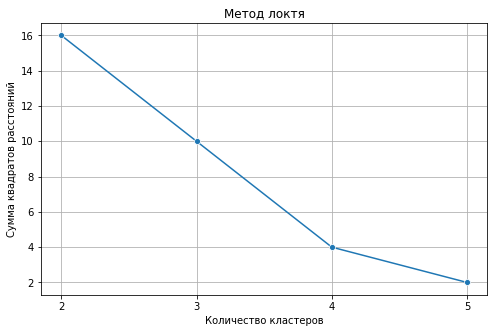

In [37]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

KMeansEstimator._choose_opyimal_n_clusters(n_clusters_range=[2, 5], X=X)

In [16]:
CohortPeriods = Literal["week", "month", 'year']

class Clasterizaror:

    def __init__(self):
        self.data = None
        self.cols_schema = None
        self.raw_cluster_matrix = None
        self.cluster_matrix = None
        self.cluster_matrix_cat_features_names = None
        self.data_preprocessor = None
        self.not_preprocess_cols = []

    
    def create_cluster_matrix(self, data: Union[pd.DataFrame, EventFrame],  cols_schema: EventFrameColsSchema, 
                              meta_info: pd.DataFrame, cohort_period: CohortPeriods) -> pd.DataFrame:
        
        self._check_input_params(data, cols_schema, meta_info)

        if isinstance(data, EventFrame):
            self.data = data.data.copy()
            self.cols_schema = data.cols_schema
        else:
            self.data = data.copy()
            self.cols_schema = cols_schema

        self.not_preprocess_cols.append(cols_schema.user_id)

        self._prepare_raw_cluster_matrix(self.data, self.cols_schema, cohort_period)
        self._create_preprocessor_pipeline()
        self._preprocess_raw_cluster_matrix()

        return self.cluster_matrix

    def _check_input_params(
            self, 
            data: Union[pd.DataFrame, 'EventFrame'],
            cols_schema: Optional[EventFrameColsSchema],
            meta_info:pd.DataFrame):
        
        if not (isinstance(data, EventFrame) or
                (isinstance(data, pd.DataFrame) and isinstance(cols_schema, EventFrameColsSchema))):
            raise ValueError('EventFrame or DataFrame with EventFrameColsSchema')
        
    def _prepare_raw_cluster_matrix(self, data: pd.DataFrame, cols_schema: EventFrameColsSchema,
                                    cohort_period: CohortPeriods  = 'month') -> pd.DataFrame:
        user_id_col = cols_schema.user_id

        users_pivot = self._count_pivot_table(data, cols_schema)
        users_sessions_stats = self._get_sessions_stats(data, cols_schema)
        users_paths_stats = self._get_user_path_stats(data, cols_schema, cohort_period)

        raw_cluster_matrix = pd.merge(
            users_pivot,
            users_sessions_stats,
            how='inner',
            on=user_id_col
        )

        raw_cluster_matrix = pd.merge(
            raw_cluster_matrix,
            users_paths_stats,
            how='inner',
            on=user_id_col
        )

        self.raw_cluster_matrix = raw_cluster_matrix
        return raw_cluster_matrix

    def _count_pivot_table(self, data: pd.DataFrame, cols_schema: EventFrameColsSchema) -> pd.DataFrame:
        user_id_col = cols_schema.user_id
        event_name_col = cols_schema.event_name
        event_id_col = cols_schema.event_id
        event_type_col = cols_schema.event_type

        return data[data[event_type_col] == EventType.RAW.value.name].pivot_table(
            columns=event_name_col,
            index=user_id_col,
            values=event_id_col,
            aggfunc='nunique'
        ).reset_index().fillna(0)
    
    def _get_sessions_stats(self, data: pd.DataFrame, cols_schema: EventFrameColsSchema) -> pd.DataFrame:
        user_id_col = cols_schema.user_id
        event_name_col = cols_schema.event_name
        event_id_col = cols_schema.event_id
        event_type_col = cols_schema.event_type
        session_id_col = cols_schema.session_id
        dt_col = cols_schema.event_timestamp

        session_start_name = EventType.SESSION_START.value.name
        session_end_name = EventType.SESSION_END.value.name
        raw_event_type_name = EventType.RAW.value.name

        session_starts = data.loc[data[event_name_col] == session_start_name, 
                                  (user_id_col, session_id_col, dt_col)]\
                        .rename(columns={
                            dt_col: 'session_start_dt'
                        })
        session_ends = data.loc[data[event_name_col] == session_end_name, 
                                  (user_id_col, session_id_col, dt_col)]\
                        .rename(columns={
                            dt_col: 'session_end_dt'
                        })
        raw_session_stats = pd.merge(
            session_starts,
            session_ends,
            how='inner',
            on=[session_id_col, user_id_col]
        )
        raw_session_stats['duration'] = (raw_session_stats['session_end_dt'] - raw_session_stats['session_start_dt'])\
            .apply(lambda delta: delta.total_seconds()).div(60)
        
        raw_session_stats = raw_session_stats.sort_values([user_id_col, 'session_start_dt'])
        raw_session_stats['gap'] = (raw_session_stats['session_end_dt'] -\
            raw_session_stats.groupby(user_id_col)['session_start_dt'].shift())\
                .apply(lambda delta: delta.total_seconds()) / 60
        
        raw_session_stats = pd.merge(
            raw_session_stats,
            data[data[event_type_col] == raw_event_type_name].groupby(session_id_col).agg(**{
                'amount_of_steps': (dt_col, 'count')
            }).reset_index(),
            how='inner',
            on=[session_id_col]
        )
        
        
        user_sessions_stats_aggs = {
            'amount_of_sessions': (session_id_col, 'count'),
        }
        for col in ['duration', 'gap', 'amount_of_steps']:
            for stat in ['min', 'max', 'mean', 'median']:
               user_sessions_stats_aggs[f'{stat}_{col}'] = (col, stat) 

        user_sessions_stats = raw_session_stats.groupby(user_id_col)\
            .agg(**user_sessions_stats_aggs).reset_index()


        return user_sessions_stats
    
    def _get_user_path_stats(self, data: pd.DataFrame, cols_schema: EventFrameColsSchema, cohort_period: CohortPeriods) -> pd.DataFrame:
        user_id_col = cols_schema.user_id
        event_name_col = cols_schema.event_name
        event_id_col = cols_schema.event_id
        event_type_col = cols_schema.event_type
        session_id_col = cols_schema.session_id
        dt_col = cols_schema.event_timestamp

        path_start_name = EventType.PATH_START.value.name
        path_end_name = EventType.PATH_END.value.name
        
        path_starts = data.loc[data[event_name_col] == path_start_name, 
                                  (user_id_col, dt_col)]\
                        .rename(columns={
                            dt_col: 'path_start_dt'
                        })
        path_ends = data.loc[data[event_name_col] == path_end_name, 
                                  (user_id_col, dt_col)]\
                        .rename(columns={
                            dt_col: 'path_end_dt'
                        })
        raw_path_stats = pd.merge(
            path_starts,
            path_ends,
            how='inner',
            on=[user_id_col]
        )
        print(raw_path_stats)
        # Rewrite to amount if days
        raw_path_stats['lifetime'] = (raw_path_stats['path_end_dt'] - raw_path_stats['path_start_dt'])\
            .apply(lambda delta: delta.total_seconds()).div(60)
        print(raw_path_stats)
        raw_path_stats = pd.merge(
            raw_path_stats,
            data.groupby(user_id_col).agg(**{
                'amount_of_active_days': (dt_col, lambda datetimes: datetimes.dt.date.nunique())
            }).reset_index(),
            how='inner',
            on=[user_id_col]
        )
        print(raw_path_stats)
        path_starts['cohort'] = path_starts['path_start_dt'].apply(lambda start_dt: self._get_cohort(start_dt, cohort_period))

        raw_path_stats = pd.merge(
            raw_path_stats,
            path_starts.loc[:, (user_id_col, 'cohort')],
            how='inner',
            on=[user_id_col]
        )

        return raw_path_stats.drop(columns=['path_start_dt', 'path_end_dt'])
        
    def _get_cohort(self, path_start_date: Union[str, pd.Timestamp], cohort_period: CohortPeriods) -> str:
        return 'cohort'
    
    def _create_preprocessor_pipeline(self) -> None: 

        raw_cluster_matrix = self.raw_cluster_matrix.drop(columns=self.not_preprocess_cols)

        num_features = raw_cluster_matrix.select_dtypes(include=np.number).columns.tolist()
        cat_features = raw_cluster_matrix.select_dtypes(include=["object"]).columns.tolist()

        num_transformer = Pipeline(steps=[("scaler", StandardScaler())])
        cat_transformer = Pipeline(steps=[("OHE", OneHotEncoder(handle_unknown='ignore', sparse=False))])

        data_preprocessor = ColumnTransformer(
            transformers=[('num', num_transformer, num_features), ("cat", cat_transformer, cat_features)],
            remainder='passthrough'
        )
        self.cluster_matrix_cat_features_names = cat_features
        self.data_preprocessor = data_preprocessor

    def _preprocess_raw_cluster_matrix(self,):
        cluster_matrix = self.data_preprocessor.fit_transform(
            self.raw_cluster_matrix.drop(columns=self.not_preprocess_cols)
        )

        # Get names of preprocessed data to create a dataframe for validating features
        new_num_names = self.data_preprocessor.transformers_[0][2].copy()
        new_cat_names = self.data_preprocessor.transformers_[1][1].named_steps['OHE']\
            .get_feature_names_out(self.cluster_matrix_cat_features_names).copy()
        new_names = np.concatenate((np.array(new_num_names, dtype="object"), new_cat_names))

        cluster_matrix = pd.DataFrame(cluster_matrix, columns=new_names)
        for col_name in self.not_preprocess_cols:
            cluster_matrix[col_name] = self.raw_cluster_matrix[col_name]
        self.cluster_matrix = cluster_matrix




In [47]:
EventType.PATH_END

<EventType.PATH_END: <eventframing.event_type.EventTypeDesc object at 0x000002B4BC57F650>>

In [17]:
cl = Clasterizaror()
cl.create_cluster_matrix(ef.to_dataframe(), ef.cols_schema, cohort_period='week', meta_info=pd.DataFrame)

   user_id       path_start_dt         path_end_dt
0        1 2023-01-01 10:00:00 2023-01-01 10:10:00
1        2 2023-01-01 10:00:00 2023-01-01 10:05:00
2        3 2023-01-01 10:00:00 2023-01-01 10:02:00
   user_id       path_start_dt         path_end_dt  lifetime
0        1 2023-01-01 10:00:00 2023-01-01 10:10:00      10.0
1        2 2023-01-01 10:00:00 2023-01-01 10:05:00       5.0
2        3 2023-01-01 10:00:00 2023-01-01 10:02:00       2.0
   user_id       path_start_dt         path_end_dt  lifetime  \
0        1 2023-01-01 10:00:00 2023-01-01 10:10:00      10.0   
1        2 2023-01-01 10:00:00 2023-01-01 10:05:00       5.0   
2        3 2023-01-01 10:00:00 2023-01-01 10:02:00       2.0   

   amount_of_active_days  
0                      1  
1                      1  
2                      1  


d:\Prog\CondaProg\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,A,B,C,amount_of_sessions,min_duration,max_duration,mean_duration,median_duration,min_gap,max_gap,mean_gap,median_gap,min_amount_of_steps,max_amount_of_steps,mean_amount_of_steps,median_amount_of_steps,lifetime,amount_of_active_days,cohort_cohort,user_id
0,1.414214,0.707107,0.0,0.707107,-0.707107,0.707107,0.000000,0.000000,1.0,1.0,1.0,1.0,-0.707107,0.707107,0.000000,0.000000,1.313198,0.0,1.0,1
1,-0.707107,-1.414214,0.0,0.707107,-0.707107,-1.414214,-1.224745,-1.224745,-1.0,-1.0,-1.0,-1.0,-0.707107,-1.414214,-1.224745,-1.224745,-0.202031,0.0,1.0,2
2,-0.707107,0.707107,0.0,-1.414214,1.414214,0.707107,1.224745,1.224745,NaN,NaN,NaN,NaN,1.414214,0.707107,1.224745,1.224745,-1.111168,0.0,1.0,3
